In [1]:
!pip install gym
!pip install stable-baselines[mpi]
!pip install tensorflow==1.15.0

     |████████████████████████████████| 240 kB 14.3 MB/s 
     |████████████████████████████████| 2.4 MB 33.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for mpi4py: filename=mpi4py-3.1.1-cp37-cp37m-linux_x86_64.whl size=2180581 sha256=2f453fc720960b3d52ee4265a698be158cd0f699df1d085ad36aab381ddc11ce
  Stored in directory: /root/.cache/pip/wheels/91/be/c0/2b0347be1de5cd8ca9fe67da7ec8c3fe8930fcb6b0df6f2255
Successfully built mpi4py
     |████████████████████████████████| 412.3 MB 29 kB/s 
     |████████████████████████████████| 503 kB 91.8 MB/s 
     |████████████████████████████████| 3.8 MB 81.9 MB/s 
     |████████████████████████████████| 50 kB 4.9 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=d06a1389bdbc62d32d8c8ada39b254ec45e4a426e684b72dcbe6d635ca13974a
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f55

# Install GymSlug

In [19]:
# # uncomment and execute to retrieve source code if necessary
# !git clone https://github.com/CMU-BORG/GymSlug
# %cd GymSlug

In [20]:
%cd GymSlug

/content/GymSlug


In [21]:
!ls

aplysia_feeding_b.py		    output_expert_mean.npy
aplysia_feeding_ub.py		    output_expert_std_egestion.npy
b_corrected_output_expert_mean.npy  output_expert_std.npy
b_corrected_output_expert_std.npy   setup.py
gym_slug			    slug.png
output_expert_mean_egestion.npy     tmp


In [22]:
!pip install -e .

Obtaining file:///content/GymSlug/GymSlug
  Running setup.py develop for gym-slug


In [23]:
import numpy as np
#%matplotlib qt
import matplotlib.pyplot as plt
import math
import matplotlib.patches as patches
import matplotlib.animation as animation
import gym
import random
float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})


# Import expert policy
The goal is to learn a policy that 
1. generates similar motor neuron control/action with the expert, 

2. shows similar or higher average episode reward with the expert (~132.8)

In [24]:
from aplysia_feeding_ub import AplysiaFeedingUB
from datetime import date

Swallowing
1200


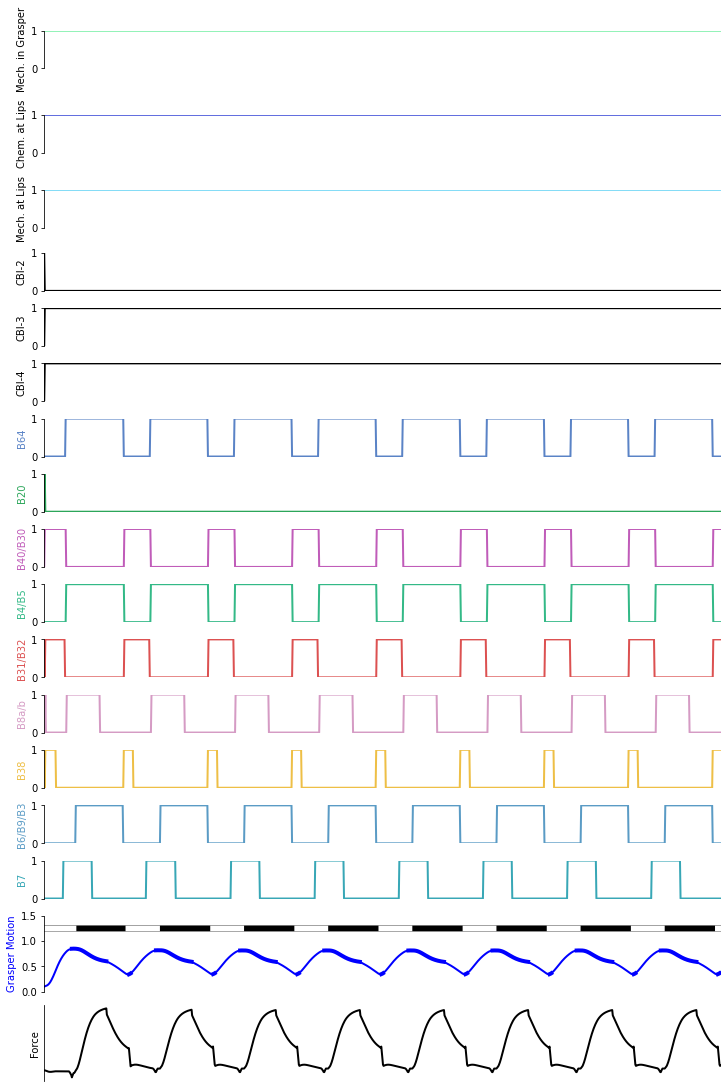

In [25]:
#Aplysia Feeding driver biting
suffix = str(date.today())
xlimits = [0,60]
## Initialize simulation object
aplysia = AplysiaFeedingUB()
## Swallowing
print('Swallowing')
aplysia.SetSensoryStates('swallow')
aplysia.RunSimulation()
aplysia.GeneratePlots_WS('Swallow_'+suffix,xlimits)

In [27]:
# # uncomment to visualize expert motion (saved to test.mp4)
# aplysia.VisualizeMotion()

# Verify Environment with Stable Baselines

In [28]:
# slug-v0: UnbreakableSeaweed, used in this notebook
# slug-v1: BreakableSeaweed
env = gym.make("gym_slug:slug-v0")

In [29]:
from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/usr/local/lib/python3.7/dist-packages/stable_baselines/__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


In [30]:
from stable_baselines.common.env_checker import check_env
check_env(env)
print('env validated. Default args: foo={}, max_steps={}, threshold={}, patience={}'.format(env.foo, env.max_steps,env.threshold, env.patience))

env validated. Default args: foo=0, max_steps=1000, threshold=-1000.0, patience=20


# Check expert performance in gym_slug

reset - current_step == self.max_steps


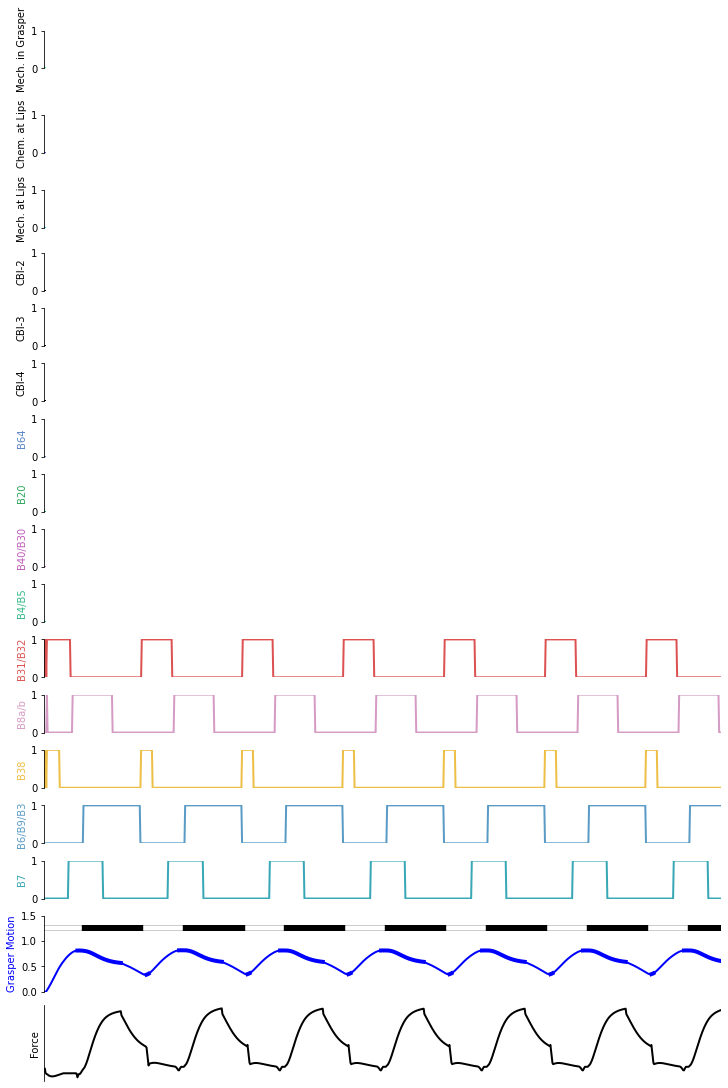

summary -> @episode 0, reward = 142.7258898285036
reset - current_step == self.max_steps


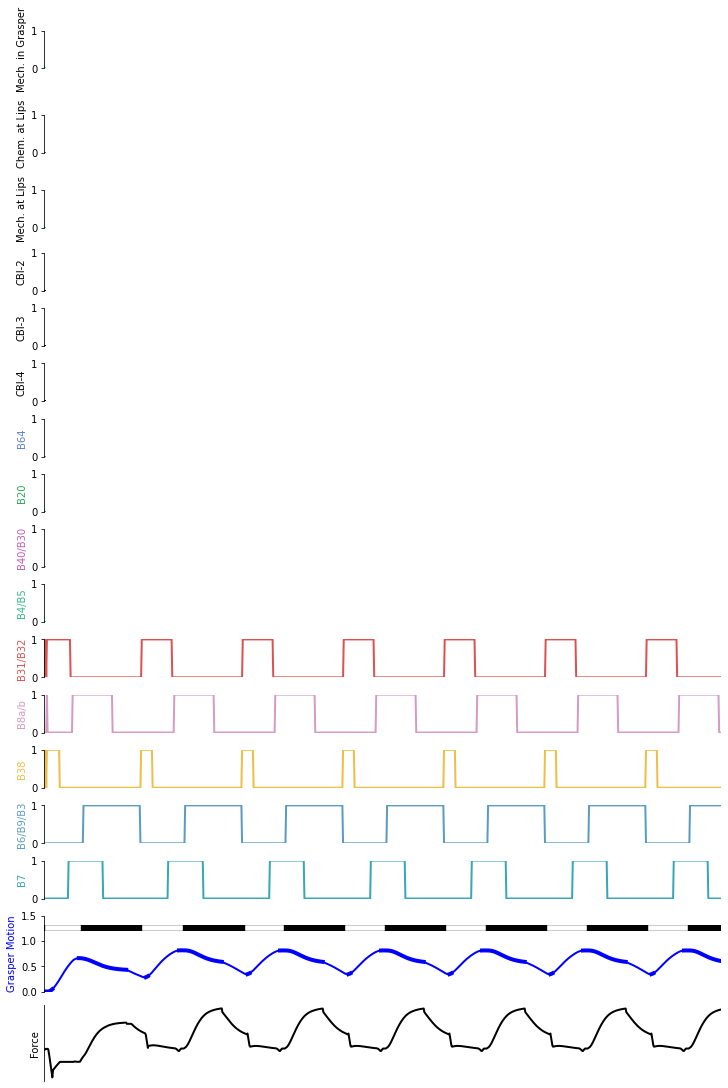

summary -> @episode 1, reward = 132.82975783080562
reset - current_step == self.max_steps


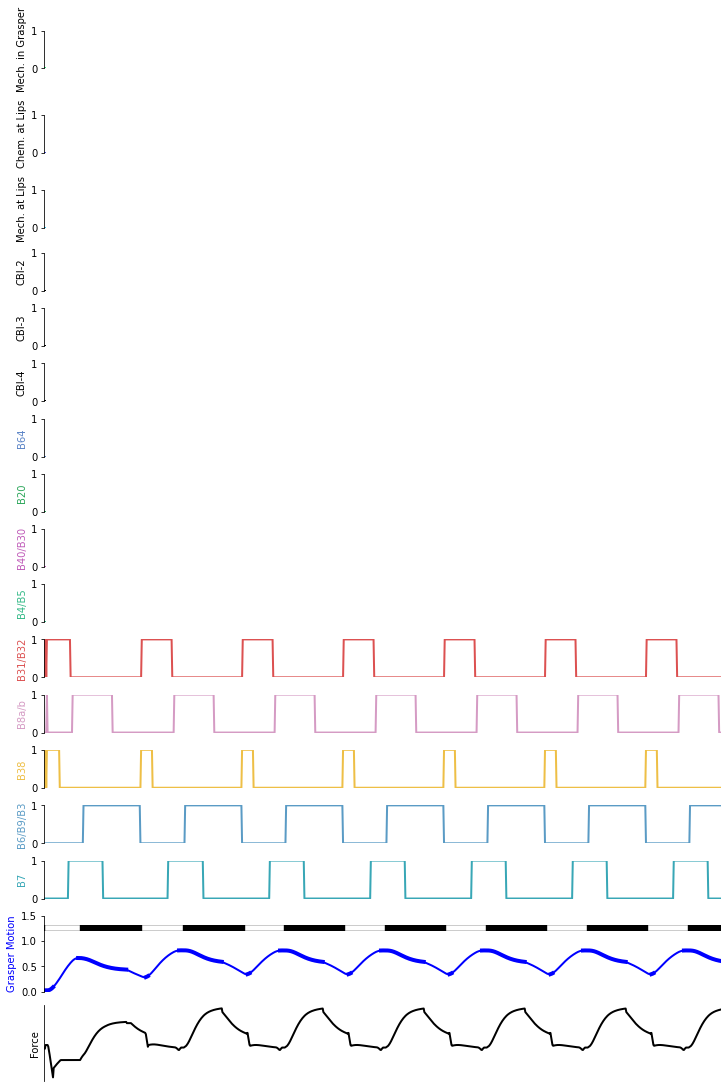

summary -> @episode 2, reward = 131.77015545845595
reset - current_step == self.max_steps


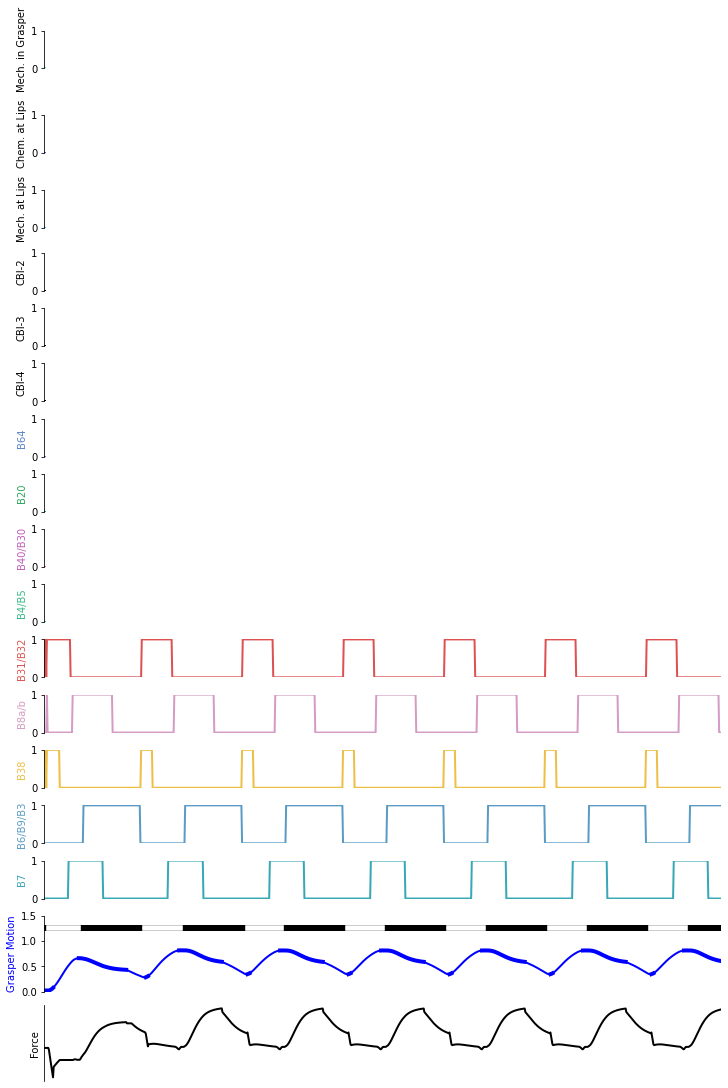

summary -> @episode 3, reward = 132.32702870337025
reset - current_step == self.max_steps


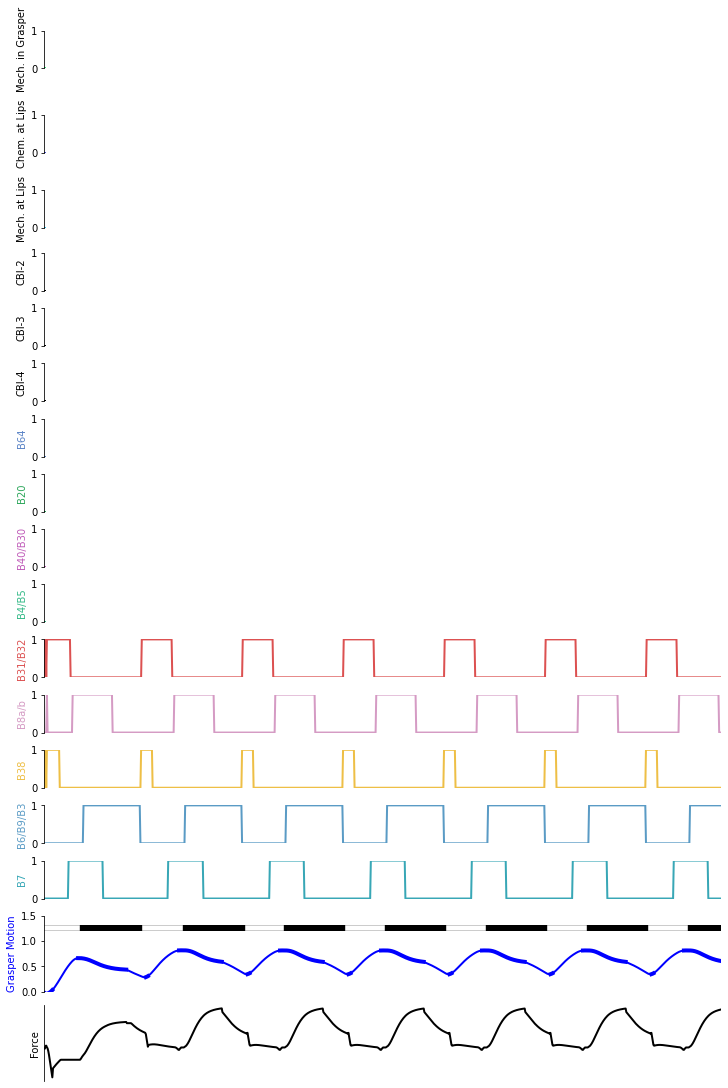

summary -> @episode 4, reward = 129.6006670572832
reset - current_step == self.max_steps


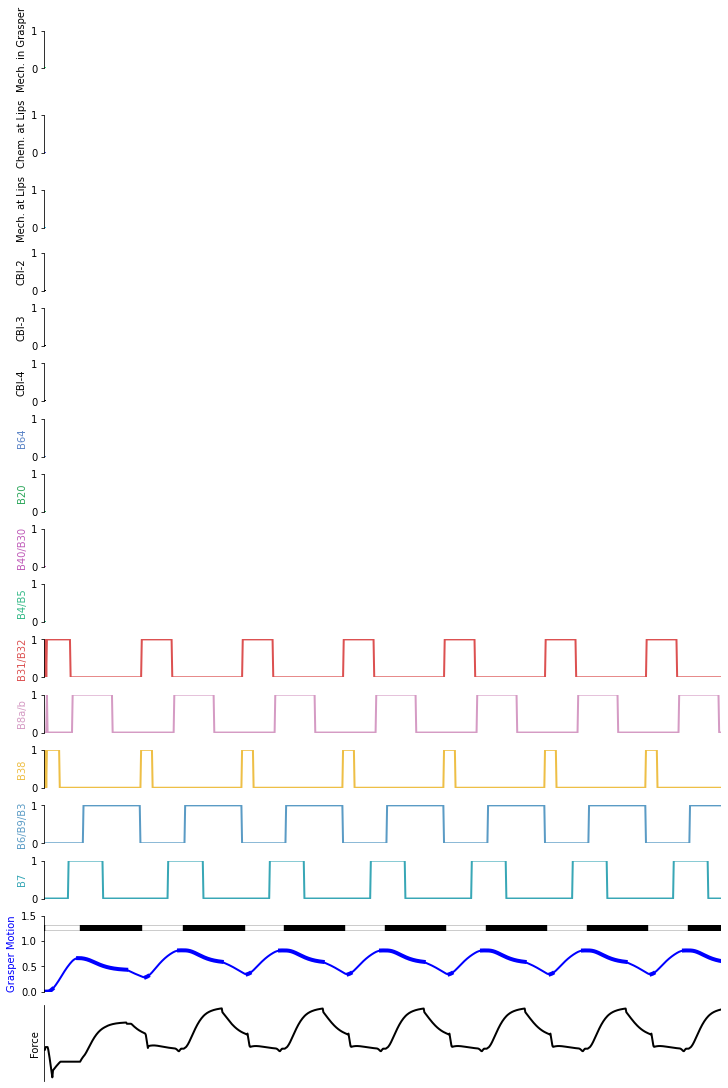

summary -> @episode 5, reward = 132.44114327982354
reset - current_step == self.max_steps


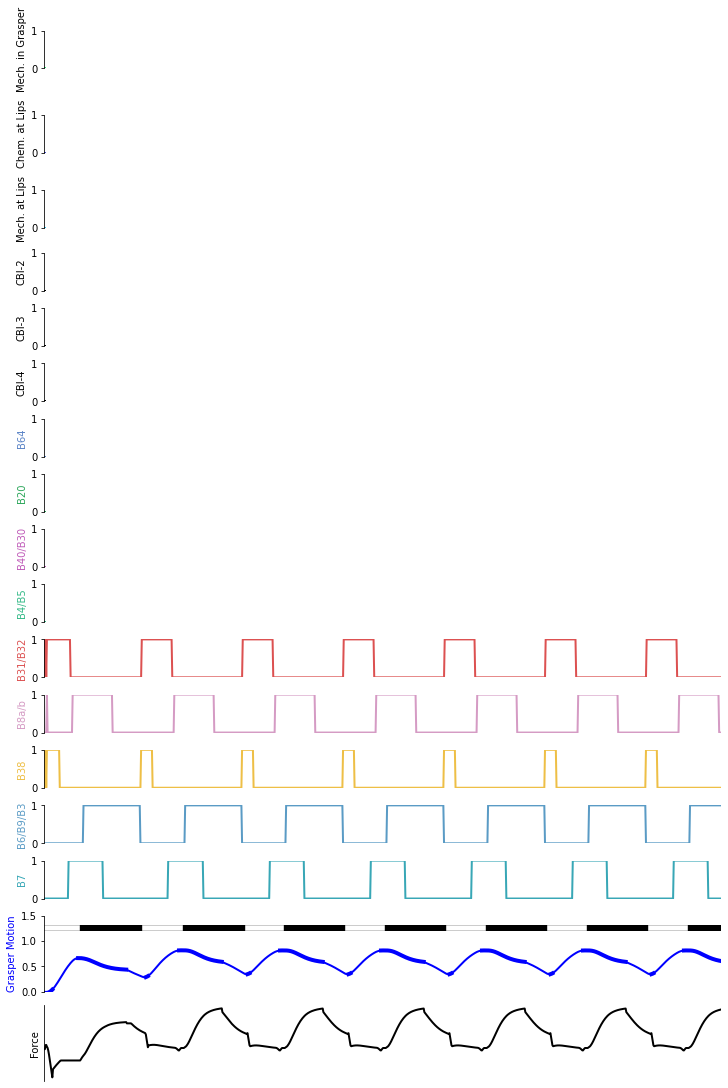

summary -> @episode 6, reward = 130.61070102287934
reset - current_step == self.max_steps


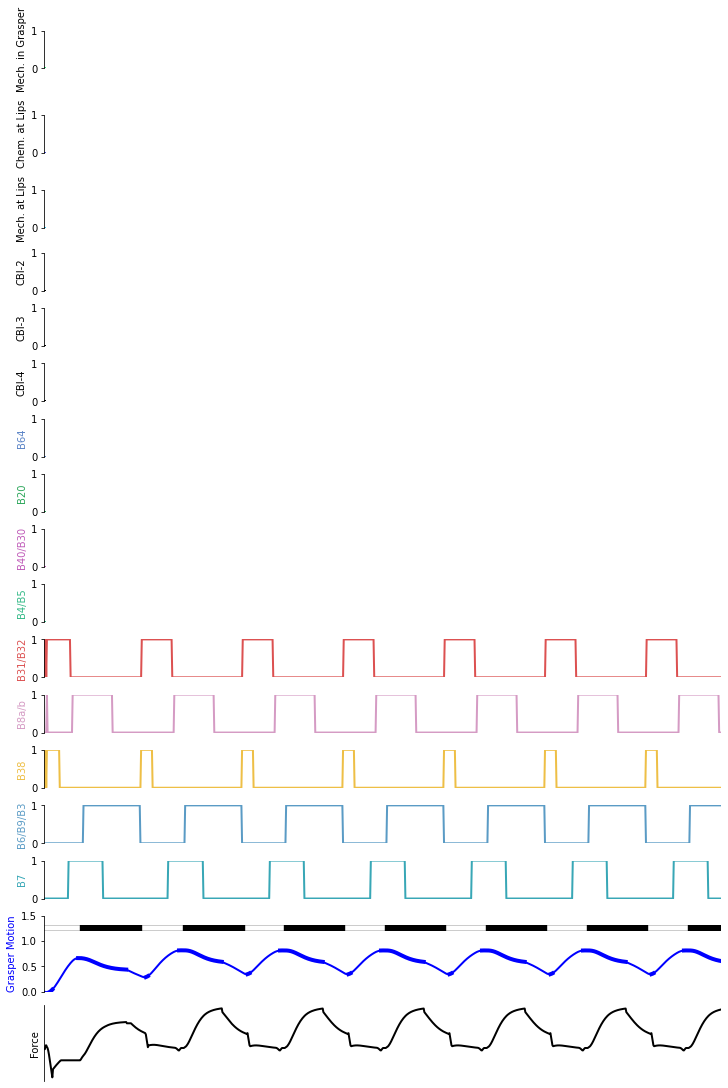

summary -> @episode 7, reward = 129.95707436050554
reset - current_step == self.max_steps


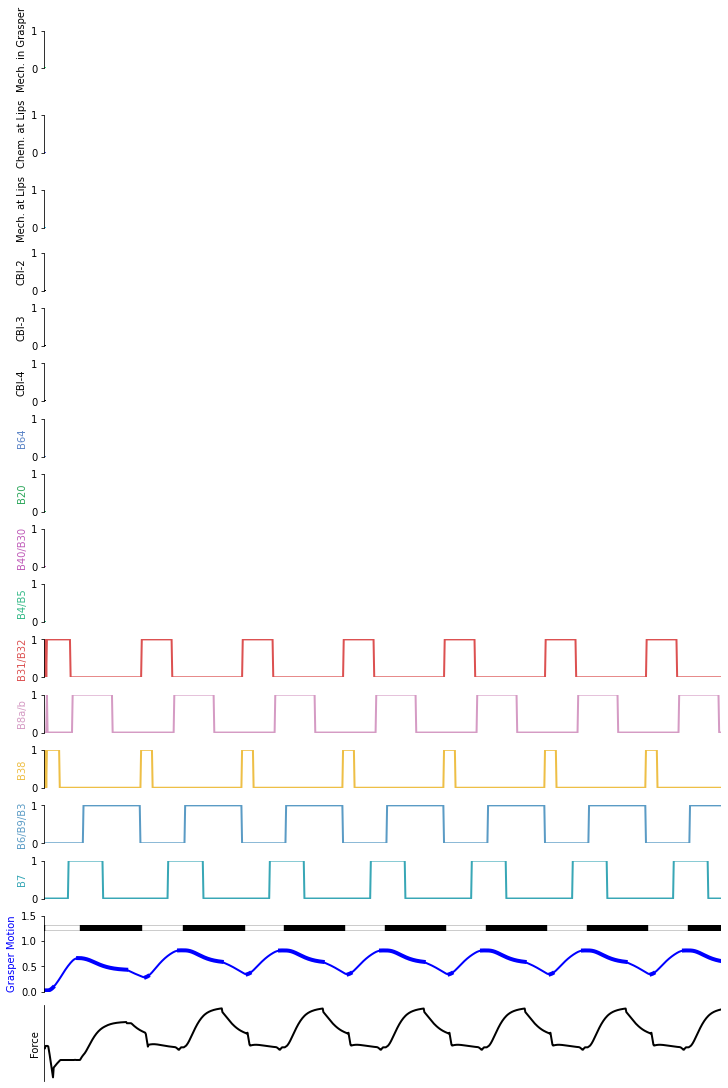

summary -> @episode 8, reward = 131.99509078314097
reset - current_step == self.max_steps


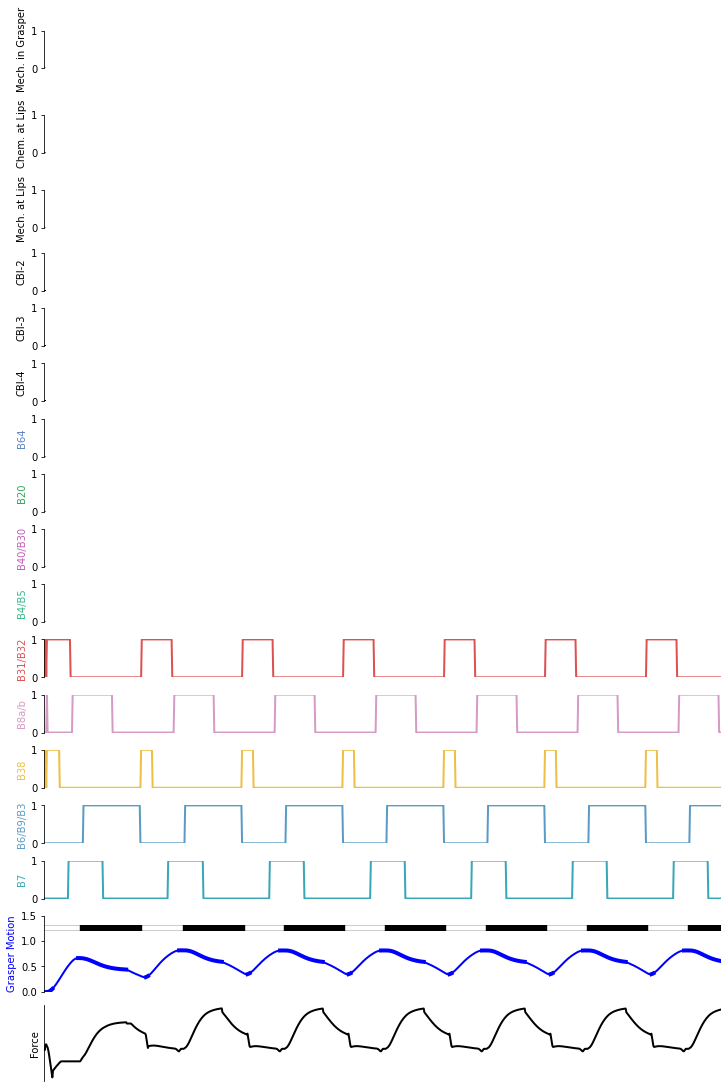

summary -> @episode 9, reward = 131.26165370045257
num_episodes: 10 num_steps: 10000
avg_length 1000.0 avg_reward: 132.55191620252205
total reward:  1325.5191620252206
std 3.5418519752970976
max:142.7258898285036, min:129.6006670572832
expert_avg_reward =  132.55191620252205


In [31]:
std_env = env
std_env.preset_inputs = 1
std_env.set_plotting(1)
std_env.set_verbose(1) # 1: print reset condition

obs = std_env.reset()
rewards = []
steps = []
reward_log = []
num_episodes = 10



for i in range(num_episodes):
    episode_reward = 0
    episode_steps = 0
    obs = std_env.reset()
    writer = []
    while True:       
        actionArray = np.ones((1,5))
        actionArray[0,2] = aplysia.B8[0,episode_steps]
        actionArray[0,4] = aplysia.B38[0,episode_steps]
        actionArray[0,1] = aplysia.B6B9B3[0,episode_steps]
        actionArray[0,3] = aplysia.B31B32[0,episode_steps]
        actionArray[0,0] = aplysia.B7[0,episode_steps]   
        action = actionArray[0,:]
        state, reward, done, info = std_env.step(action)
        
        episode_steps += 1
        episode_reward += reward
        writer.append(reward)
        if done:
            break

    print('summary -> @episode {}, reward = {}'.format(i, episode_reward))  
    rewards.append(episode_reward)
    steps.append(episode_steps)
    reward_log.append(writer)


num_steps = np.sum(steps)
avg_length = np.mean(steps)
avg_reward = np.mean(rewards)
total_reward = np.sum(rewards)
print('num_episodes:', num_episodes, 'num_steps:', num_steps)
print('avg_length', avg_length, 'avg_reward:', avg_reward)
print('total reward: ',total_reward)
print('std', np.std(rewards))
print('max:{}, min:{}'.format(np.max(rewards), np.min(rewards)))
expert_avg_reward = np.mean(rewards)
print('expert_avg_reward = ', expert_avg_reward)



# Utility function for training process monitoring

In [32]:
def compute_avg_return(environment, model, num_episodes=10, verbose = 0, drop_out = 0):
    total_return = 0.0
    record = np.zeros(num_episodes)
    for i in range(num_episodes):
        obs = environment.reset()
        episode_return = 0.0
        while True:
            action, _states = model.predict(obs)
            obs, reward, done, info = environment.step(action) # todo Wen: action shape!
            if verbose:
                print('ep:{}.rw:{}.act:{}.o_stat:{}.n_stat;{}'.format(i,time_step.reward.numpy(),action_step.action[0],old_step.observation.numpy()[0,:],time_step.observation.numpy()[0,:]))
            episode_return += reward # = or +=
            if done:
                break

        record[i] = episode_return
        total_return += episode_return
        print('eval-summary --> eps = {}, episode reward = {}'.format(i, episode_return))
    if drop_out:
        keep = int(num_episodes/2)
        record = np.sort(record)[keep-1:]
        avg_return = np.average(record)
        return avg_return
    else: 
        avg_return = total_return / num_episodes
        print('std:{}, max:{}, min:{}'.format(np.std(record), np.max(record), np.min(record)))
        return avg_return

# Create environments for training, evaluation, and plotting

In [33]:
# initiate training env
train_env = gym.make("gym_slug:slug-v0")
train_env.present_inputs = 0
train_env.set_verbose(0)

# initiate evalation env
eval_env = gym.make("gym_slug:slug-v0")
eval_env.set_verbose(0)
eval_env.present_inputs = 0

# initiate an env with plotting
plot_env = gym.make("gym_slug:slug-v0")
plot_env.set_plotting(2)
plot_env.present_inputs = 0

# Train vanilla DQN. Periodically evalulate using callback

In [34]:
# training parameters
num_iterations = 500000 # @param {type:"integer"} or 1M
log_interval = 100  # @param {type:"integer"}
num_eval_episodes = 5  # @param {type:"integer"}
eval_interval = 500  # @param {type:"integer"}

In [35]:
from stable_baselines import DQN
import os
import gym
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.patches as patches
import matplotlib.animation as animation

from stable_baselines import DDPG
from stable_baselines.ddpg.policies import LnMlpPolicy
from stable_baselines import results_plotter
from stable_baselines.bench import Monitor
from stable_baselines.results_plotter import load_results, ts2xy
from stable_baselines.common.noise import AdaptiveParamNoiseSpec
from stable_baselines.common.callbacks import BaseCallback

class SaveOnBestTrainingRewardCallback(BaseCallback):
    """
    Callback for saving a model (the check is done every ``check_freq`` steps)
    based on the training reward (in practice, we recommend using ``EvalCallback``).

    :param check_freq: (int)
    :param log_dir: (str) Path to the folder where the model will be saved.
      It must contains the file created by the ``Monitor`` wrapper.
    :param verbose: (int)
    """
    def __init__(self, plot_env, eval_env, num_eval_episodes, log_interval: int, eval_interval: int, log_dir: str, verbose=1):
        super(SaveOnBestTrainingRewardCallback, self).__init__(verbose)
        self.log_interval = log_interval
        self.eval_interval = eval_interval
        self.log_dir = log_dir
        self.save_path = os.path.join(log_dir, 'best_model')
        self.best_reward = 0
        self.plot_env = plot_env
        self.eval_env = eval_env
        self.num_eval_episodes = num_eval_episodes
        self.eval_r_log = []
        self.eval_i_log = []

    def _init_callback(self) -> None:
        # Create folder if needed
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self) -> bool:
        if self.n_calls % self.log_interval == 0:
            print('Reach step {}'.format(self.n_calls))
        if self.n_calls % self.eval_interval == 0:
            # Mean training reward over the last 100 episodes
            avg_reward = compute_avg_return(self.eval_env, self.model, self.num_eval_episodes, 0, 0)
            self.eval_r_log.append(avg_reward)
            self.eval_i_log.append(self.n_calls)
            # New best model, you could save the agent here
            if avg_reward > self.best_reward:
                self.best_reward = avg_reward
                print("best policy updated, avg_reward={}".format(avg_reward))
                self.model.save(self.save_path + str(avg_reward))
                compute_avg_return(self.plot_env, self.model, 2, 0, 0)
            elif avg_reward > 125:
                print('avg_return={}>125'.format(avg_reward))
                self.model.save(self.save_path + str(avg_reward))
                compute_avg_return(self.plot_env, self.model, 2, 0, 0)

        return True
    
    def _on_training_end(self):
        print(self.eval_r_log)
        plt.plot(self.eval_i_log, self.eval_r_log)
        plt.hlines(expert_avg_reward, 0, max(self.eval_i_log), 'r')
        plt.ylabel('Average Return') 
        plt.xlabel('Iterations')
        plt.show()



In [36]:
best_reward = 0
log_dir = '/content/'
os.makedirs(log_dir, exist_ok=True)

train_env = Monitor(train_env, log_dir)

In [ ]:
# Create the callback
callback = SaveOnBestTrainingRewardCallback(plot_env, eval_env, num_eval_episodes, log_interval=log_interval, eval_interval=eval_interval, log_dir=log_dir)
model = DQN('MlpPolicy', train_env, learning_rate=2.5e-4, prioritized_replay=True, verbose=1)
# Train the agent
model.learn(total_timesteps=num_iterations, callback=callback)

In [ ]:
callback._on_training_end()

In [ ]:
!zip -r usage.zip /content

In [ ]:
from google.colab import files
files.download('usage.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>